<a href="https://colab.research.google.com/github/shwetajain1022/Project-4/blob/main/Test_LSTM_Electricity_Non_Renews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Read in data
import pandas as pd
url="https://raw.githubusercontent.com/shwetajain1022/Project-4/main/FinalModelCSV/energyconsumptiongdppopulation.csv"
df = pd.read_csv(url)
df.head()

,country_code,country,distribution_losses_electricity,coal_peat_and_manufactured_gases,combustible_renewables,geothermal,hydro,natural_gas,nuclear,oil_and_petroleum_products,...,other_renewables,others,solar,wind,total_exports_electricity,total_imports_electricity,used_for_pumped_storage_electricity,GDPpermonth,date,populationpermonth
0,ARG,Argentina,0.0,254.9680,103.7220,0.0,1890.1710,6962.6050,356.1880,1383.5360,...,0.0,0.0,1.1920,44.2530,0.0,0.0,0.0,4.956242e+10,2015-04-01,4.282366e+07
1,ARG,Argentina,0.0,59.6120,23.6500,0.0,2367.2000,6072.3430,717.6860,1415.1950,...,0.0,0.0,0.8230,51.0640,0.0,0.0,0.0,4.646092e+10,2016-04-01,4.328477e+07
2,ARG,Argentina,0.0,276.3790,57.9470,0.0,2149.5890,6520.0640,244.1920,902.2170,...,0.0,0.0,1.0770,45.5990,0.0,0.0,0.0,5.363575e+10,2017-04-01,4.374185e+07
3,ARG,Argentina,0.0,189.0145,56.9715,0.0,2267.9021,7488.1914,580.6021,736.8802,...,0.0,0.0,1.7048,58.7371,0.0,0.0,0.0,4.373500e+10,2018-04-01,4.419471e+07
4,ARG,Argentina,0.0,0.0000,97.5631,0.0,1939.1236,6748.3905,643.5017,41.3014,...,0.0,0.0,49.9768,327.3478,0.0,0.0,0.0,3.731292e+10,2019-04-01,4.464257e+07


In [2]:
# Create df of only datapoint from Australia, sorted by date
aus_df = df[df['country_code'] =='AUS'].sort_values('date')
# Show tail of df
aus_df.head()

,country_code,country,distribution_losses_electricity,coal_peat_and_manufactured_gases,combustible_renewables,geothermal,hydro,natural_gas,nuclear,oil_and_petroleum_products,...,other_renewables,others,solar,wind,total_exports_electricity,total_imports_electricity,used_for_pumped_storage_electricity,GDPpermonth,date,populationpermonth
132,AUS,Australia,1414.546,14796.776,216.287,0.083,990.728,3544.365,0.0,732.302,...,0.0,0.0,49.216,409.469,0.0,0.0,6.75,9.571750e+10,2010-01-01,2.171999e+07
120,AUS,Australia,1311.132,13482.774,216.287,0.083,983.425,3624.479,0.0,401.521,...,0.0,0.0,38.884,390.199,0.0,0.0,6.75,9.571750e+10,2010-02-01,2.174834e+07
168,AUS,Australia,1374.157,14529.374,216.287,0.083,852.869,3334.396,0.0,87.778,...,0.0,0.0,37.252,415.654,0.0,0.0,6.75,9.571750e+10,2010-03-01,2.177668e+07
84,AUS,Australia,1266.285,12999.464,216.287,0.083,1044.406,3392.874,0.0,58.605,...,0.0,0.0,26.811,350.511,0.0,0.0,6.75,9.571750e+10,2010-04-01,2.180502e+07
180,AUS,Australia,1371.409,13822.503,216.287,0.083,1318.908,3883.549,0.0,238.421,...,0.0,0.0,19.523,296.832,0.0,0.0,6.75,9.571750e+10,2010-05-01,2.183336e+07


In [3]:
# Get date range of data
print(f'Latest date: {aus_df.date.max()}')
print(f'Latest date: {aus_df.date.min()}')

Latest date: 2021-12-01
Latest date: 2010-01-01


In [4]:
# Convert date to datetime datatype
#aus_df['date'] = aus_df['date'].astype('datetime64[ns]')
aus_df['date']=pd.to_datetime(aus_df['date'])
# Check datatypes
aus_df.dtypes

country_code                                   object
country                                        object
distribution_losses_electricity               float64
coal_peat_and_manufactured_gases              float64
combustible_renewables                        float64
geothermal                                    float64
hydro                                         float64
natural_gas                                   float64
nuclear                                       float64
oil_and_petroleum_products                    float64
other_combustible_non-renewables              float64
other_renewables                              float64
others                                        float64
solar                                         float64
wind                                          float64
total_exports_electricity                     float64
total_imports_electricity                     float64
used_for_pumped_storage_electricity           float64
GDPpermonth                 

In [5]:
aus_df['non_renews']=aus_df['coal_peat_and_manufactured_gases']+aus_df['natural_gas']+aus_df['oil_and_petroleum_products']+aus_df['other_combustible_non-renewables']
aus_df.head()

,country_code,country,distribution_losses_electricity,coal_peat_and_manufactured_gases,combustible_renewables,geothermal,hydro,natural_gas,nuclear,oil_and_petroleum_products,...,others,solar,wind,total_exports_electricity,total_imports_electricity,used_for_pumped_storage_electricity,GDPpermonth,date,populationpermonth,non_renews
132,AUS,Australia,1414.546,14796.776,216.287,0.083,990.728,3544.365,0.0,732.302,...,0.0,49.216,409.469,0.0,0.0,6.75,9.571750e+10,2010-01-01,2.171999e+07,19073.443
120,AUS,Australia,1311.132,13482.774,216.287,0.083,983.425,3624.479,0.0,401.521,...,0.0,38.884,390.199,0.0,0.0,6.75,9.571750e+10,2010-02-01,2.174834e+07,17508.774
168,AUS,Australia,1374.157,14529.374,216.287,0.083,852.869,3334.396,0.0,87.778,...,0.0,37.252,415.654,0.0,0.0,6.75,9.571750e+10,2010-03-01,2.177668e+07,17951.548
84,AUS,Australia,1266.285,12999.464,216.287,0.083,1044.406,3392.874,0.0,58.605,...,0.0,26.811,350.511,0.0,0.0,6.75,9.571750e+10,2010-04-01,2.180502e+07,16450.943
180,AUS,Australia,1371.409,13822.503,216.287,0.083,1318.908,3883.549,0.0,238.421,...,0.0,19.523,296.832,0.0,0.0,6.75,9.571750e+10,2010-05-01,2.183336e+07,17944.473


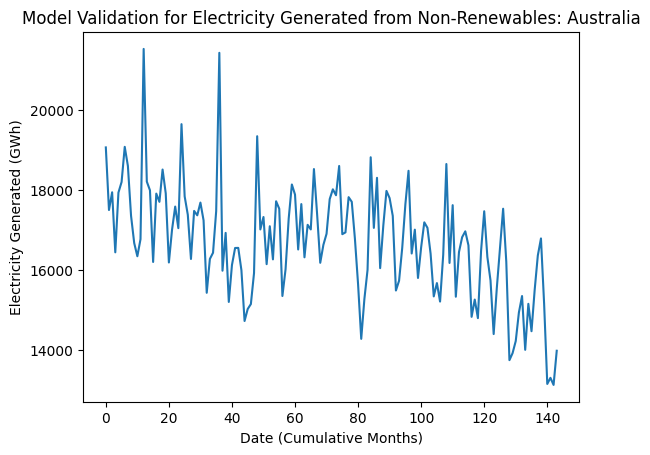

In [6]:
import pandas
import matplotlib.pyplot as plt
dataset = aus_df['non_renews']
plt.plot(dataset.values)
plt.ylabel('Electricity Generated (GWh)')
plt.xlabel('Date (Cumulative Months)')
plt.title("Model Validation for Electricity Generated from Non-Renewables: Australia")
plt.show()

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

In [8]:
# fix random seed for reproducibility
tf.random.set_seed(7)

In [9]:
# load the dataset
dataframe=aus_df[['non_renews']]
dataset=dataframe.values
dataset = dataset.astype('float32')

In [10]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [11]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size], dataset[train_size:len(dataset)]
print(len(train), len(test))

96 48


In [12]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return np.array(dataX), np.array(dataY)

In [13]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [14]:
# reshape input to be [samples, time steps, features]
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [15]:
# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)

Epoch 1/100
94/94 - 2s - loss: 0.1157 - 2s/epoch - 20ms/step
Epoch 2/100
94/94 - 0s - loss: 0.0421 - 155ms/epoch - 2ms/step
Epoch 3/100
94/94 - 0s - loss: 0.0219 - 145ms/epoch - 2ms/step
Epoch 4/100
94/94 - 0s - loss: 0.0198 - 146ms/epoch - 2ms/step
Epoch 5/100
94/94 - 0s - loss: 0.0198 - 160ms/epoch - 2ms/step
Epoch 6/100
94/94 - 0s - loss: 0.0196 - 144ms/epoch - 2ms/step
Epoch 7/100
94/94 - 0s - loss: 0.0195 - 141ms/epoch - 1ms/step
Epoch 8/100
94/94 - 0s - loss: 0.0195 - 145ms/epoch - 2ms/step
Epoch 9/100
94/94 - 0s - loss: 0.0196 - 155ms/epoch - 2ms/step
Epoch 10/100
94/94 - 0s - loss: 0.0197 - 142ms/epoch - 2ms/step
Epoch 11/100
94/94 - 0s - loss: 0.0198 - 154ms/epoch - 2ms/step
Epoch 12/100
94/94 - 0s - loss: 0.0195 - 144ms/epoch - 2ms/step
Epoch 13/100
94/94 - 0s - loss: 0.0196 - 147ms/epoch - 2ms/step
Epoch 14/100
94/94 - 0s - loss: 0.0198 - 150ms/epoch - 2ms/step
Epoch 15/100
94/94 - 0s - loss: 0.0195 - 146ms/epoch - 2ms/step
Epoch 16/100
94/94 - 0s - loss: 0.0194 - 145ms/epoc

In [16]:
# make predictions
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
# invert predictions
trainPredict = scaler.inverse_transform(model.predict(trainX))
trainY = scaler.inverse_transform([trainY])
testPredict = scaler.inverse_transform(model.predict(testX))
testY = scaler.inverse_transform([testY])
# calculate root mean squared error
trainScore = np.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

2/2 [==============================] - 0s 5ms/step
Train Score: 1158.72 RMSE
Test Score: 1433.37 RMSE


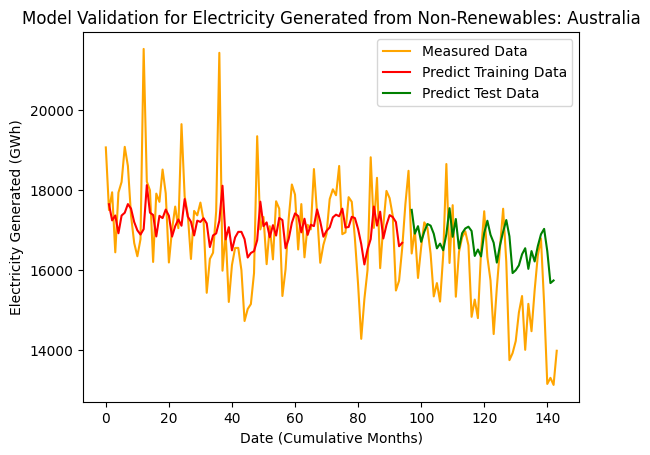

In [17]:
# shift train predictions for plotting
trainPredictPlot = np.empty_like(dataset)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = np.empty_like(dataset)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset), label="Measured Data", color="orange")
plt.plot(trainPredictPlot, label="Predict Training Data", color="red")
plt.plot(testPredictPlot, label="Predict Test Data", color="green")
plt.legend()
plt.ylabel('Electricity Generated (GWh)')
plt.xlabel('Date (Cumulative Months)')
plt.title("Model Validation for Electricity Generated from Non-Renewables: Australia")
plt.show()